In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier

In [29]:
df = pd.read_csv('data/cleaned_normalized_remaining_na_-1.csv')

X = df.drop(columns=['id', 'churn', "remaining_contract","service_failure_count"])
print(df["churn"].value_counts())
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

churn
1    40050
0    31843
Name: count, dtype: int64


In [35]:
clf_forest = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=200, class_weight = "balanced")
clf_forest.fit(X_train,y_train)
y_pred = clf_forest.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Точність (Precision): {precision:.2f}")
print(f"Повнота (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      9553
           1       0.83      0.70      0.76     12015

    accuracy                           0.75     21568
   macro avg       0.76      0.76      0.75     21568
weighted avg       0.76      0.75      0.75     21568

Точність: 0.75
Точність (Precision): 0.83
Повнота (Recall): 0.70
F1 Score: 0.76


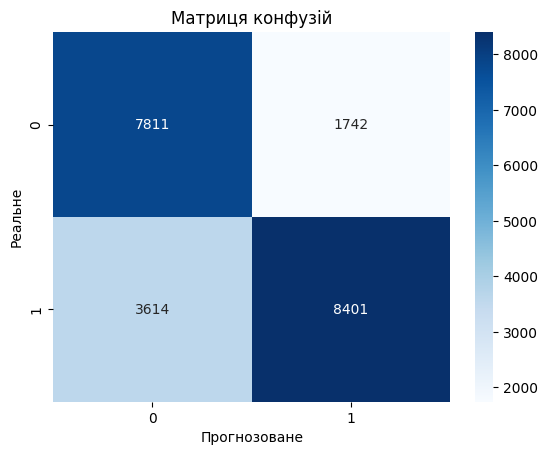

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця конфузій')
plt.xlabel('Прогнозоване')
plt.ylabel('Реальне')
plt.show()
